本教程使用chili_wcs库进行简单的WCS校准
只需要调用WCSSolver.relative_solver()函数，并输入IFU和Guider的观测数据，以及猜测的IFU和Guider的视场中心坐标,就能完成IFU和Guider的相对位置定标。

In [1]:
from chili_wcs.wcs_solver import WCSSolver
from astropy.coordinates import SkyCoord
from astropy import units as u

# 1.Guider和IFU之间的相对位置定标
由于IFU在观测时，视场内没有足够的星点去解算恒星，因此我们需要借助导星相机来推断IFU的指向和WCS。\

但是这需要知道IFU和Guider之间的相对位置，因此我们需要进行相对位置定标。\
相对位置定标需要同时让IFU和Chili焦面Guider指向同一个天区观测。\

下面的程序 WCSSolver.relative_solver需要同时输入IFU和Chili焦面的Guider的观测数据，并输入猜测的IFU和Guider的视场中心坐标，用于解算的初始值。

程序会输出IFU和Guider的相对位置，并保存WCS结果到IWCS.fits文件中。 该文件里保存的相对位置关系参数，可以用来换算Guider和IFU之间的WCS参数。

注意:Chili有两个导星,一个是和IFU同焦面的导星(Chili Guider)，另一个是位于耐焦的额外的导星(Nasmyth Guider)， WCSSolver.relative_solver的 mode ="guider"时,会解算相对于Chili Guider的相对位置参数，而mode="nasmyth"时可用于解算Nasmyth Guider与IFU的相对位置关系

下一节的WCSSolver.all_relative_solver方法可以直接用于解算IFU相对于两个Guider的相对位置关系


Starting to solve guider WCS...

Starting to solve guider WCS...
1-1: Loading guider image
1-2: Getting star pixel coordinates and sky coordinates


/home/xiongyf/anaconda3/lib/python3.9/site-packages/astropy/units/equivalencies.py:100: RuntimeWarning: divide by zero encountered in divide
  d = 1 / x
/home/xiongyf/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in pdp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:4998: RuntimeWarning: invalid value encountered in pmsafe
  ra2, dec2, pmr2, pmd2, px2, rv2, c_retval = ufunc.pmsafe(
/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "pmsafe" yielded 2 of "distance overridden (Note 6)", 1 of "binary logical OR of the above warnings"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


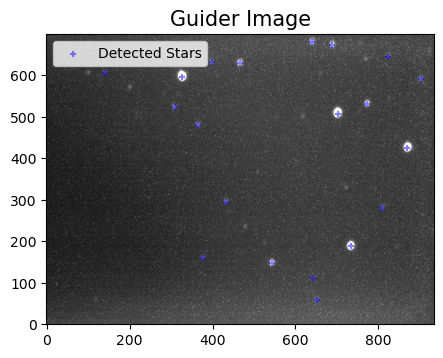

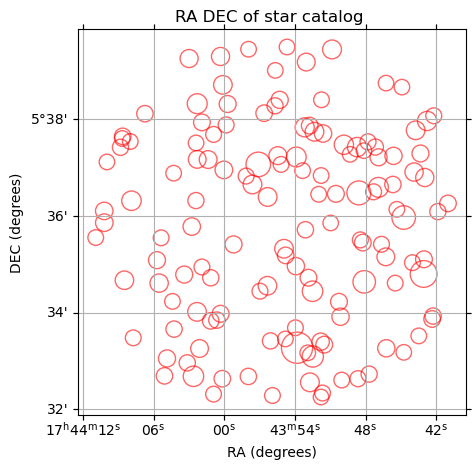

Found 20 stars in the image
Found 136 catalog stars in the field
1-3: Triangle matching
Number of matched triangles: 34
1-4: WCS fitting
Initial fitting parameters: [265.9797838641666, 5.597150969166666, 0, 0, 180]
best_error:216.16697580228322
bestfit:[ 2.65961532e+02  5.58957180e+00 -1.90141444e-05  1.27672958e-04
  2.48610635e+02]
best_error:211.48065403377083
bestfit:[ 2.65971777e+02  5.60545094e+00 -5.68198190e-05  6.30446756e-05
  1.68858915e+02]
best_error:129.40376454675354
bestfit:[ 2.65977349e+02  5.61352974e+00 -9.94981243e-05  2.58007019e-05
  1.50224655e+02]
best_error:86.35934088071004
bestfit:[ 2.65974620e+02  5.59261483e+00 -8.39824992e-05  9.70995298e-05
  1.78571135e+02]
best_error:64.24445339910933
bestfit:[ 2.65973698e+02  5.59285979e+00 -8.48649227e-05  9.66874347e-05
  1.84709464e+02]
best_error:47.525006284436614
bestfit:[ 2.65972242e+02  5.59442923e+00 -8.63001974e-05  9.65609412e-05
  1.76296361e+02]
best_error:0.10943737743739229
bestfit:[ 2.65975463e+02  5.59

/home/xiongyf/Code/Chili/chili_wcs/chili_wcs/load_data.py:117: RuntimeWarning: Mean of empty slice
  sum_fluxes[i] = np.nanmean(self.rss[i, 1020:1300])


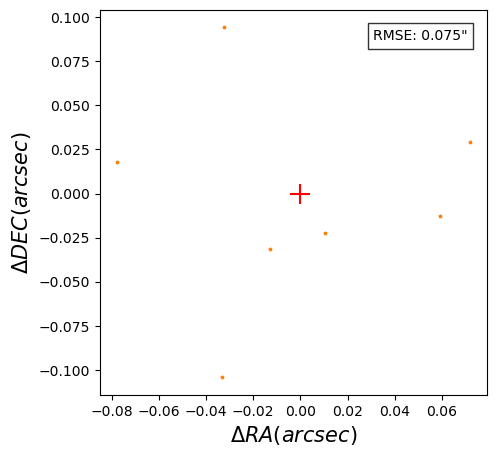

<Figure size 640x480 with 0 Axes>

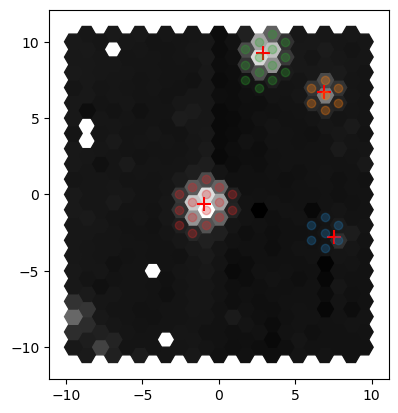

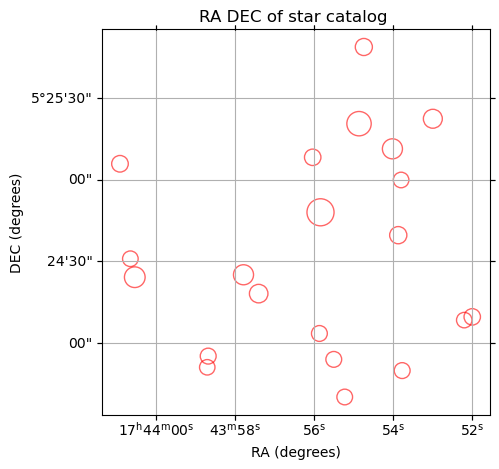

Found 4 stars in the image
Found 21 catalog stars in the field
2-3: Triangle matching
Number of matched triangles: 4
2-4: Intermediate WCS fitting
Initial fitting parameters: [0, 89.82, 0, 0, 190]
best_error:0.5647986522012607
bestfit:[ 2.03720300e-01  8.98191609e+01 -9.53203970e-04  9.28391137e-04
  1.80520543e+02]
best_error:0.5498787067658344
bestfit:[ 2.07966706e-01  8.98191712e+01 -9.54411507e-04  9.26778293e-04
  1.80523647e+02]
best_error:0.4728309927339244
bestfit:[ 2.02927154e-01  8.98191486e+01 -9.50425270e-04  9.26906372e-04
  1.80638590e+02]
Best Fit WCS is [ 2.02927154e-01  8.98191486e+01 -9.50425270e-04  9.26906372e-04
  1.80638590e+02]
Fitted WCS parameters:
OrderedDict([('ICRPIX1', 0), ('ICRPIX2', 0), ('ICRVAL1', 0.20292715364407848), ('ICRVAL2', 89.81914859237965), ('ICD1_1', -0.000950425270190617), ('ICD2_2', 0.0009269063718107978), ('ILONPOLE', 180.63858978989612)])
Fitted celestial coordinates: 
 [[265.97866021   5.4223359 ]
 [265.97456133   5.41105946]
 [265.974939

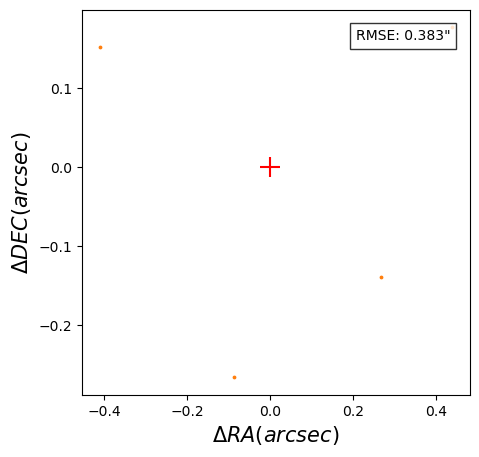

In [2]:

# 请将数据保存到自己的路径下，修改下面的路径，我提供了一组mock数据
guider_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/Chili_Guider_kopff27.fits"  # Guider图像路径
ifu_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/IFU_RSS_kopff27.fits"  # IFU图像路径
save_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/results"  # 保存WCS结果的路径

# guider和ifu的视场中心坐标猜测值,用于解算的初始值，可以肉眼简单对比一下aladin里的图像后猜测，或者使用astrometry.net进行解算后获得
c_guider = SkyCoord("17:43:55.1481274 +05:35:49.743489",unit=(u.hourangle, u.deg), frame="icrs")
c_ifu = SkyCoord("17:43:55.7813867 +05:24:48.016101",unit=(u.hourangle, u.deg), frame="icrs")

wcs_result = WCSSolver.relative_solver(
    guider_path=guider_path,                # Guider图像路径
    ifu_path=ifu_path,                      # IFU图像路径
    save_path=save_path,                    # 保存WCS结果的路径
    # Guider参数
    ra_guess_guider=c_guider.ra.deg,        # Guider视场中心RA初始猜测值(度)
    dec_guess_guider=c_guider.dec.deg,      # Guider视场中心Dec初始猜测值(度)
    n_pixs_guider=8,                        # 用于Guider匹配的像素坐标数
    n_stars_guider=15,                      # 用于Guider匹配的星表星数
    match_radius_guider=0.05,               # Guider三角形匹配半径
    target_err_guider=0.2,                  # Guider目标误差阈值(角秒)
    min_data_points_guider=5,               # Guider最少匹配点数要求
    # IFU参数
    ra_guess_ifu=c_ifu.ra.deg ,             # IFU视场中心RA初始猜测值(度)
    dec_guess_ifu=c_ifu.dec.deg,            # IFU视场中心Dec初始猜测值(度)
    n_pixs_ifu=5,                           # 用于IFU匹配的像素坐标数
    n_stars_ifu=9,                          # 用于IFU匹配的星表星数
    backparam={'background':True,'k':0.3,'ndex':12}, # IFU背景拟合参数
    match_radius_ifu=0.1,                   # IFU三角形匹配半径
    target_err_ifu=0.5,                     # IFU目标误差阈值(角秒)
    min_data_points_ifu=3,                  # IFU最少匹配点数要求
    mode="guider",                          # 使用chili焦面导星模式
    plot=True                               # 显示结果图
)


# 1-2 IFU 与 chili焦面导星与耐焦导星的相对位置定标
WCSSolver.all_relative_solver方法可以一句话直接用于解算IFU相对于两个Guider的相对位置关系，输入两个guider数据的路径,和IFU的RSS文件的路径，基于三者猜测的初始中心指向坐标。就能将解算结果保存在IWCS.fits里，其中HDU1保存的是相对于Chili Guider 的相对位置参数， HDU2里保存的是相对于Nasmyth Guider的相对位置参数。


Solving WCS for both guider and nasmyth modes...

=== SOLVING GUIDER MODE ===

Starting to solve guider WCS...

Starting to solve guider WCS...
1-1: Loading guider image
1-2: Getting star pixel coordinates and sky coordinates


/home/xiongyf/anaconda3/lib/python3.9/site-packages/astropy/units/equivalencies.py:100: RuntimeWarning: divide by zero encountered in divide
  d = 1 / x
/home/xiongyf/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in pdp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:4998: RuntimeWarning: invalid value encountered in pmsafe
  ra2, dec2, pmr2, pmd2, px2, rv2, c_retval = ufunc.pmsafe(
/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "pmsafe" yielded 2 of "distance overridden (Note 6)", 1 of "binary logical OR of the above warnings"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


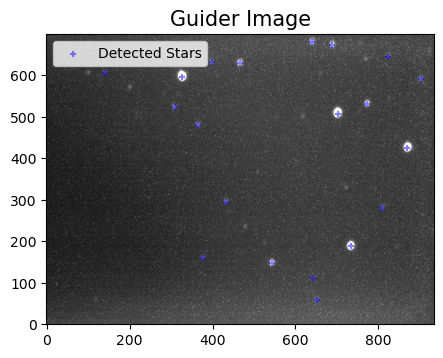

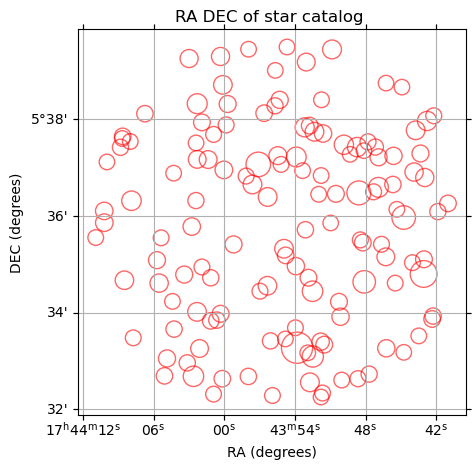

Found 20 stars in the image
Found 136 catalog stars in the field
1-3: Triangle matching
Number of matched triangles: 34
1-4: WCS fitting
Initial fitting parameters: [265.9797838641666, 5.597150969166666, 0, 0, 180]
best_error:202.0769289585871
bestfit:[ 2.65997290e+02  5.57150691e+00 -1.31598414e-04  1.02106993e-04
  1.93876671e+02]
best_error:191.20847410186894
bestfit:[ 2.65990779e+02  5.61488822e+00 -9.86027814e-05  2.74725262e-15
  1.62742029e+02]
best_error:76.09958462551637
bestfit:[ 2.65963417e+02  5.61991054e+00 -5.69429456e-05  9.73038669e-20
  1.48481286e+02]
best_error:73.9251225726537
bestfit:[ 2.65959670e+02  5.59378141e+00 -3.88518873e-05  9.03533691e-05
  1.86129034e+02]
best_error:64.44581285041532
bestfit:[ 2.65962969e+02  5.61829311e+00 -6.68077221e-05  6.20599712e-18
  1.47327780e+02]
best_error:42.823901288935296
bestfit:[ 2.65971925e+02  5.59495966e+00 -8.49005915e-05  9.77439432e-05
  1.74572179e+02]
best_error:0.18603892388643245
bestfit:[ 2.65975492e+02  5.59369

/home/xiongyf/Code/Chili/chili_wcs/chili_wcs/load_data.py:117: RuntimeWarning: Mean of empty slice
  sum_fluxes[i] = np.nanmean(self.rss[i, 1020:1300])


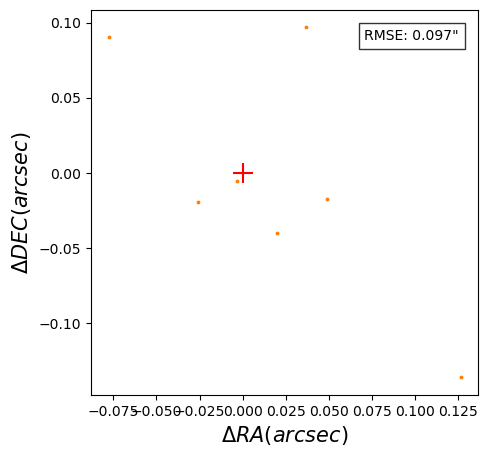

<Figure size 640x480 with 0 Axes>

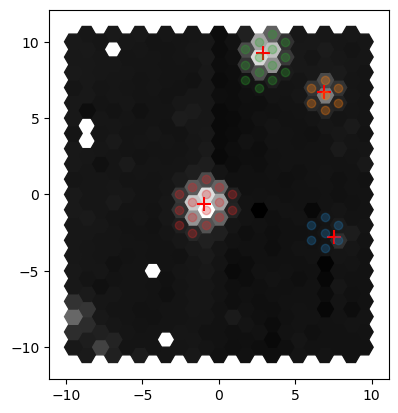

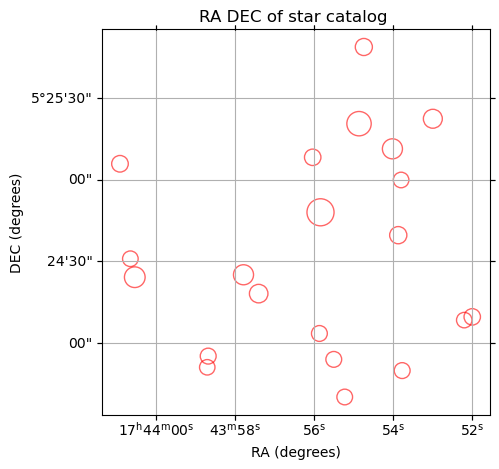

Found 4 stars in the image
Found 21 catalog stars in the field
2-3: Triangle matching
Number of matched triangles: 4
2-4: Intermediate WCS fitting
Initial fitting parameters: [0, 89.82, 0, 0, 190]
best_error:0.5648014576499835
bestfit:[ 1.35658982e-01  8.98191227e+01 -9.53206883e-04  9.28391176e-04
  1.80510986e+02]
best_error:0.5498750340558872
bestfit:[ 1.39892335e-01  8.98191330e+01 -9.54408662e-04  9.26778408e-04
  1.80514013e+02]
best_error:0.47296198049883575
bestfit:[ 1.34891747e-01  8.98191105e+01 -9.50432467e-04  9.26906837e-04
  1.80628457e+02]
Best Fit WCS is [ 1.34891747e-01  8.98191105e+01 -9.50432467e-04  9.26906837e-04
  1.80628457e+02]
Fitted WCS parameters:
OrderedDict([('ICRPIX1', 0), ('ICRPIX2', 0), ('ICRVAL1', 0.13489174684888605), ('ICRVAL2', 89.819110505655), ('ICD1_1', -0.0009504324673981852), ('ICD2_2', 0.0009269068374645535), ('ILONPOLE', 180.62845716642173)])
Fitted celestial coordinates: 
 [[265.97866018   5.42233591]
 [265.97456139   5.41105943]
 [265.974939

/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "pmsafe" yielded 6 of "distance overridden (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


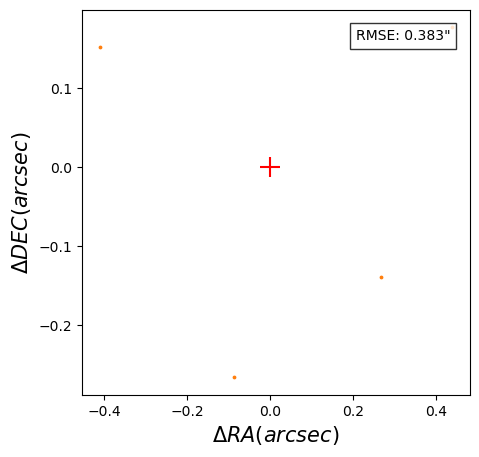

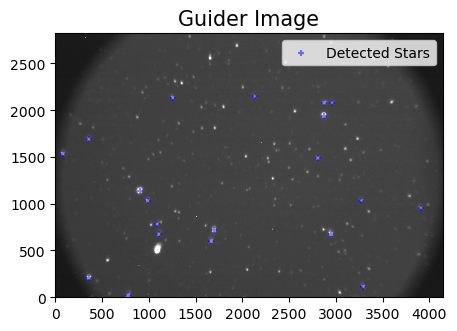

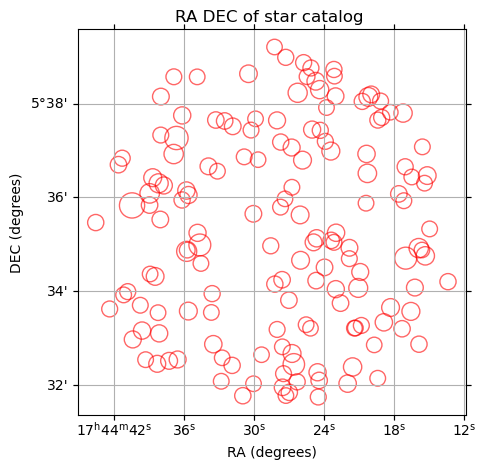

Found 20 stars in the image
Found 153 catalog stars in the field
1-3: Triangle matching
Number of matched triangles: 39
1-4: WCS fitting
Initial fitting parameters: [266.11783878, 5.589913369444444, 0, 0, 180]
best_error:138.7914777766434
bestfit:[ 2.66122839e+02  5.57840441e+00 -4.51915482e-20  3.85435315e-05
  2.64511678e+02]
best_error:136.57894552626504
bestfit:[ 2.66166009e+02  5.61653589e+00 -1.01680161e-19  5.90888677e-05
  2.20819549e+02]
best_error:118.33009451527569
bestfit:[ 2.66054844e+02  5.59844562e+00 -3.58429566e-05  2.11001016e-18
  2.20854282e+02]
best_error:113.57899892621612
bestfit:[ 2.66018017e+02  5.59882093e+00 -5.43090209e-05  2.96883868e-06
  1.99738268e+02]
best_error:0.19217782177095993
bestfit:[ 2.66110831e+02  5.59006568e+00 -4.32151309e-05  4.32230639e-05
  1.30022612e+02]
Best Fit WCS is [ 2.66110831e+02  5.59006568e+00 -4.32151309e-05  4.32230639e-05
  1.30022612e+02]
Fitted WCS parameters:
OrderedDict([('GCRPIX1', 2072.5), ('GCRPIX2', 1411.5), ('GCRVAL

/home/xiongyf/Code/Chili/chili_wcs/chili_wcs/load_data.py:117: RuntimeWarning: Mean of empty slice
  sum_fluxes[i] = np.nanmean(self.rss[i, 1020:1300])


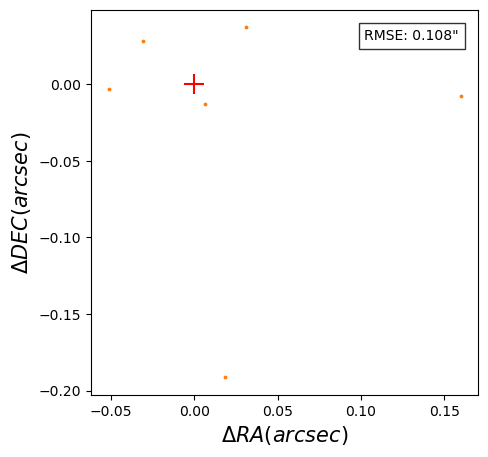

<Figure size 640x480 with 0 Axes>

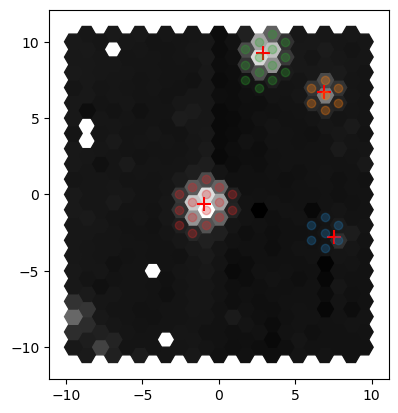

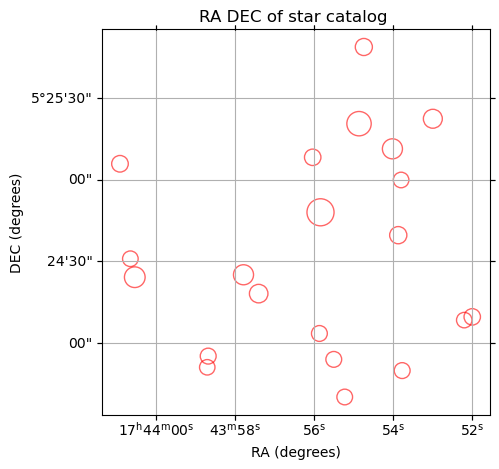

Found 4 stars in the image
Found 21 catalog stars in the field
2-3: Triangle matching
Number of matched triangles: 4
2-4: Intermediate WCS fitting
Initial fitting parameters: [305.4, 89.787, 0, 0, 144.6]
best_error:0.5498615224034004
bestfit:[ 2.74253334e+02  8.97817563e+01 -9.54406509e-04  9.26778403e-04
  1.42486866e+02]
best_error:0.473462016358272
bestfit:[ 2.74253697e+02  8.97817289e+01 -9.50418472e-04  9.26907708e-04
  1.42605024e+02]
Best Fit WCS is [ 2.74253697e+02  8.97817289e+01 -9.50418472e-04  9.26907708e-04
  1.42605024e+02]
Fitted WCS parameters:
OrderedDict([('ICRPIX1', 0), ('ICRPIX2', 0), ('ICRVAL1', 274.2536974485576), ('ICRVAL2', 89.78172892985906), ('ICD1_1', -0.0009504184721710637), ('ICD2_2', 0.0009269077077378304), ('ILONPOLE', 142.6050242281316)])
Fitted celestial coordinates: 
 [[265.97456157   5.41105935]
 [265.97865999   5.42233595]
 [265.97493944   5.41985318]
 [265.98263321   5.41326853]]
True celestial coordinates: 
 [[265.97443898   5.41101032]
 [265.97858

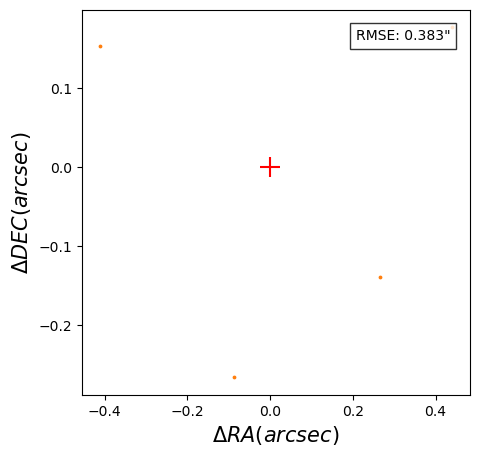

In [3]:
# 请将数据保存到自己的路径下，修改下面的路径

guider_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/Chili_Guider_kopff27.fits"  # Guider图像路径
# 耐焦导星的路径
guider_nasmyth_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/Nasmyth_Guider_kopff27.fits" 
# IFU的RSS数据的路径
ifu_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/IFU_RSS_kopff27.fits"  # IFU图像路径

# 保存相对位置定标IWCS.fits结果的路径，也可以直接提供一个带名字的fits，比如"/yoursavepath/IWCS.fits"    
save_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/results"  
# guider和ifu的视场中心坐标猜测值,用于解算的初始值，可以肉眼简单对比一下aladin里的图像后猜测，或者使用astrometry.net进行解算后获得
c_guider = SkyCoord("17:43:55.1481274 +05:35:49.743489",unit=(u.hourangle, u.deg), frame="icrs")
c_guider_nasmyth = SkyCoord("17:44:28.2813072 +05:35:23.688130", unit=(u.hourangle, u.deg), frame="icrs")
c_ifu = SkyCoord("17:43:55.7813867 +05:24:48.016101",unit=(u.hourangle, u.deg), frame="icrs")


wcs_result = WCSSolver.all_relative_solver(
    guider_path=guider_path,                # Guider图像路径
    ifu_path=ifu_path,                      # IFU图像路径
    nasmyth_guider_path=guider_nasmyth_path, # 耐焦导星图像路径
    save_path=save_path,                    # 保存WCS结果的路径
    # Guider参数
    ra_guess_guider=c_guider.ra.deg,        # Guider视场中心RA初始猜测值(度)
    dec_guess_guider=c_guider.dec.deg,      # Guider视场中心Dec初始猜测值(度)
    n_pixs_guider=8,                        # 用于Guider匹配的像素坐标数
    n_stars_guider=15,                      # 用于Guider匹配的星表星数
    match_radius_guider=0.05,               # Guider三角形匹配半径
    target_err_guider=0.2,                  # Guider目标误差阈值(角秒)
    min_data_points_guider=5,               # Guider最少匹配点数要求
    # 耐焦导星参数
    ra_guess_nasmyth_guider=c_guider_nasmyth.ra.deg, # 耐焦导星视场中心RA初始猜测值(度)
    dec_guess_nasmyth_guider=c_guider_nasmyth.dec.deg, # 耐焦导星视场中心Dec初始猜测值(度)
    n_pixs_nasmyth_guider=10,               # 用于耐焦导星匹配的像素坐标数
    n_stars_nasmyth_guider=15,              # 用于耐焦导星匹配的星表星数
    match_radius_nasmyth_guider=0.1,        # 耐焦导星三角形匹配半径
    target_err_nasmyth_guider=0.5,          # 耐焦导星目标误差阈值(角秒)
    min_data_points_nasmyth_guider=2,       # 耐焦导星最少匹配点数要求
    # IFU参数
    ra_guess_ifu=c_ifu.ra.deg ,      # IFU视场中心RA初始猜测值(度)
    dec_guess_ifu=c_ifu.dec.deg,    # IFU视场中心Dec初始猜测值(度)
    n_pixs_ifu=5,                           # 用于IFU匹配的像素坐标数
    n_stars_ifu=9,                          # 用于IFU匹配的星表星数
    backparam={'background':True,'k':0.3,'ndex':12}, # IFU背景拟合参数
    match_radius_ifu=0.1,                   # IFU三角形匹配半径
    target_err_ifu=0.5,                     # IFU目标误差阈值(角秒)
    min_data_points_ifu=3,                  # IFU最少匹配点数要求
    plot=True                               # 显示结果图
)

# 2.观测后利用Guider图像转换出IFS的WCS参数和指向
进行科学观测时，我们需要同时打开Guider进行图像拍摄，这样在数据处理的时候，可以解算Guider的WCS参数，然后利用相对位置关系IWCS.fits文件，转换出IFS的WCS参数和指向。



Loading IWCS reference file...

Loading IFU data...
Loading guider camera data...

Starting to solve guider WCS...
1-1: Loading guider image
1-2: Getting star pixel coordinates and sky coordinates


/home/xiongyf/Code/Chili/chili_wcs/chili_wcs/load_data.py:117: RuntimeWarning: Mean of empty slice
  sum_fluxes[i] = np.nanmean(self.rss[i, 1020:1300])
/home/xiongyf/anaconda3/lib/python3.9/site-packages/astropy/units/equivalencies.py:100: RuntimeWarning: divide by zero encountered in divide
  d = 1 / x
/home/xiongyf/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in pdp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:4998: RuntimeWarning: invalid value encountered in pmsafe
  ra2, dec2, pmr2, pmd2, px2, rv2, c_retval = ufunc.pmsafe(
/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "pmsafe" yielded 2 of "distance overridden (Note 6)", 1 of "binary logical OR of the above warnings"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


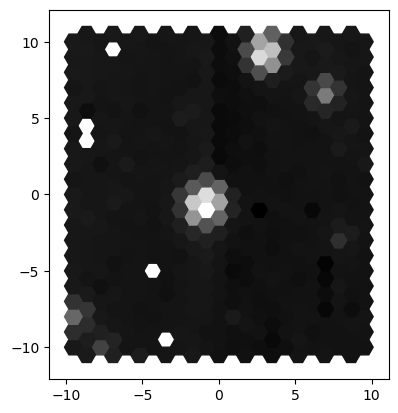

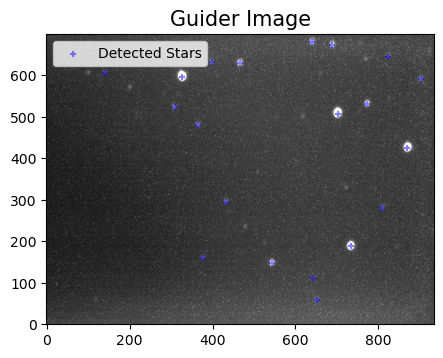

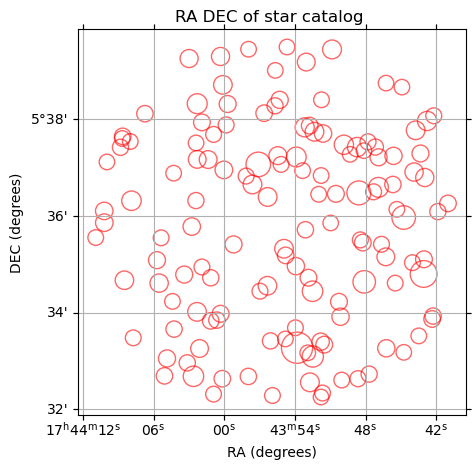

Found 20 stars in the image
Found 136 catalog stars in the field
1-3: Triangle matching
Number of matched triangles: 34
1-4: WCS fitting
Initial fitting parameters: [265.9797838641666, 5.597150969166666, 0, 0, 180]
best_error:227.2368336900108
bestfit:[ 2.65980077e+02  5.59500154e+00 -7.20586271e-05  3.31130890e-21
  1.56336217e+02]
best_error:156.31105421404138
bestfit:[ 2.65976646e+02  5.58671046e+00 -9.79821463e-05  1.09497611e-04
  2.06030097e+02]
best_error:114.12042048636981
bestfit:[ 2.65963587e+02  5.61541887e+00 -7.51487601e-05  1.59810551e-05
  1.21879175e+02]
best_error:63.72754913813468
bestfit:[ 2.65958075e+02  5.62077153e+00 -5.65182448e-05  4.75011602e-22
  1.32529778e+02]
best_error:0.17307185511151196
bestfit:[ 2.65975468e+02  5.59367461e+00 -9.55963503e-05  9.57486861e-05
  1.77898547e+02]
Best Fit WCS is [ 2.65975468e+02  5.59367461e+00 -9.55963503e-05  9.57486861e-05
  1.77898547e+02]
Fitted WCS parameters:
OrderedDict([('GCRPIX1', 467.5), ('GCRPIX2', 350.5), ('GCRV

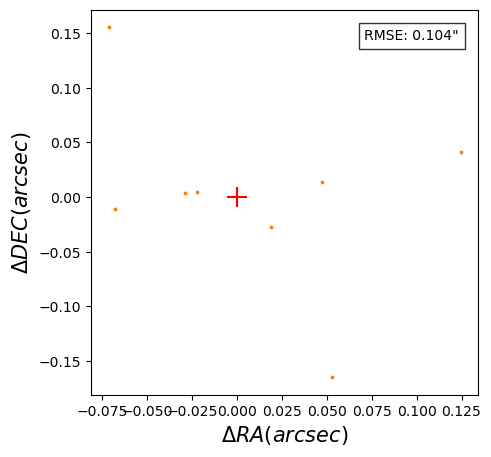

In [3]:
# 下面的程序需要输入Guider的观测数据和IWCS.fits文件，并输入猜测的Guider的视场中心坐标，用于解算的初始值。
# 程序会输出IFU的WCS参数，并保存到新的FITS文件中。

# 设置参数
guider_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/Chili_Guider_kopff27.fits"  # Guider图像
iwcs_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/results/IWCS_20250415.fits"  # IWCS文件路径
ifu_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/IFU_RSS_kopff27.fits"  # IFU图像路径
save_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/results"  # 保存WCS结果的路径

# guider的视场中心坐标猜测值,用于解算的初始值，可以肉眼简单对比一下aladin里的图像后猜测，或者使用astrometry.net进行解算后获得
c_guider = SkyCoord("17:43:55.1481274 +05:35:49.743489",unit=(u.hourangle, u.deg), frame="icrs")

wcs_result = WCSSolver.ifu_solver(
    guider_path=guider_path,                # Guider图像路径
    ifu_path=ifu_path,                      # IFU图像路径
    iwcs_path=iwcs_path,                    # IWCS文件路径
    save_path=save_path,                    # 保存WCS结果的路径
    ra_guess_guider=c_guider.ra.deg,        # Guider视场中心RA初始猜测值(度)
    dec_guess_guider=c_guider.dec.deg,      # Guider视场中心Dec初始猜测值(度)
    n_pixs_guider=8,                        # 用于Guider匹配的像素坐标数
    n_stars_guider=15,                      # 用于Guider匹配的星表星数
    match_radius_guider=0.05,               # Guider三角形匹配半径
    target_err_guider=0.2,                  # Guider目标误差阈值(角秒)
    min_data_points_guider=5,               # Guider最少匹配点数要求
    mode = "guider",                        # 使用chili焦面导星解算后换算IFU的WCS，如果是耐焦导星，则使用mode="nasmyth"
    plot=True                               # 显示结果图
)


In [4]:
print(wcs_result)

OrderedDict([('CRPIX1', 0.0), ('CRPIX2', 0.0), ('CRVAL1', 265.98255776973554), ('CRVAL2', 5.41292284894213), ('CD1_1', -0.000950058562331441), ('CD1_2', -2.6657142107097563e-05), ('CD2_1', -2.5997309786747048e-05), ('CD2_2', 0.0009265421875027559)])


# 读取天体测量定标后的IFU数据，并绘图
该数据中hdu1保存了原始的rss数据，hdu2保存了每个spaxel对应的几何坐标和天球坐标，可以用来绘制光纤阵列在天空中的位置。

In [5]:
from astropy.io import fits
# 读取mock_RSS_radec.fits文件
file_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/results/IFU_RSS_kopff27_radec.fits"
hdul = fits.open(file_path)
# 打印文件信息
hdul.info()
# 读取RADEC表数据
radec_data = hdul['RADEC'].data
# 打印RADEC表的前几行数据
print(radec_data)
# 关闭文件
hdul.close()
print(hdul["RADEC"].header)


Filename: /home/xiongyf/Code/Chili/chili_wcs/example/example_data/results/IFU_RSS_kopff27_radec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  RSS           1 ImageHDU        23   (2064, 494)   float64   
  2  RADEC         1 BinTableHDU     36   494R x 6C   [K, D, D, D, D, D]   
[(  0, -3.71535714e+01,  9.52627944, -10. , 265.97274756, 5.40430329)
 (  1, -3.66607143e+01,  9.52627944,  -9. , 265.97272143, 5.40522983)
 (  2, -3.60035714e+01,  9.52627944,  -8. , 265.9726953 , 5.40615637)
 (  3, -3.77214286e+01,  9.52627944,  -7. , 265.97266917, 5.40708292)
 (  4, -3.78428571e+01,  9.52627944,  -6. , 265.97264304, 5.40800946)
 (  5, -3.75035714e+01,  9.52627944,  -5. , 265.97261691, 5.408936  )
 (  6, -3.77964286e+01,  9.52627944,  -4. , 265.97259078, 5.40986254)
 (  7, -3.70464286e+01,  9.52627944,  -3. , 265.97256466, 5.41078908)
 (  8, -3.56142857e+01,  9.52627944,  -2. , 265.97253853, 5.41171562)
 (  9, -3.692

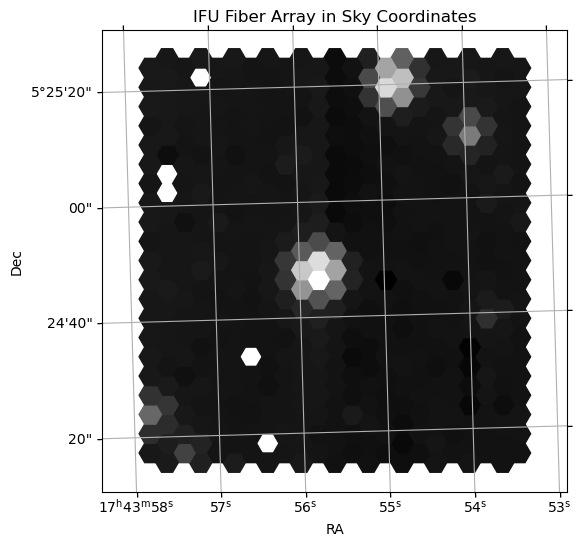

In [7]:
from astropy.wcs import WCS
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from astropy.visualization import AsinhStretch
from astropy.visualization.mpl_normalize import ImageNormalize


sum_fluxes = radec_data['SUM_FLUXES']   
ra_fiber = radec_data['RA_FIBER']
dec_fiber = radec_data['DEC_FIBER']
x_fiber = radec_data['X_FIBER']
y_fiber = radec_data['Y_FIBER']

wcs = WCS(header = hdul['RADEC'].header)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection=wcs)

# 设置colormap和归一化
cmap = cm.get_cmap('gray')
stretch = AsinhStretch(0.01)
norm = ImageNormalize(vmin=min(sum_fluxes), vmax=max(sum_fluxes), stretch=stretch)
zcolor = cmap(norm(sum_fluxes))
# 绘制每个光纤的六边形
for i in range(len(x_fiber)):
    hexagon = RegularPolygon((x_fiber[i], y_fiber[i]), 
                            numVertices=6,
                            radius=0.5/np.cos(np.pi/6),
                            orientation=np.pi/2,
                            color=zcolor[i])
    ax.add_patch(hexagon)

plt.xlim(-12,12)
plt.ylim(-12,12)
# 设置坐标轴标签
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
plt.title('IFU Fiber Array in Sky Coordinates')
ax.grid(True)
plt.show()